### Portfolio Part 4

In this Portfolio task 4, I will work on the dataset downloaded on Kaggle named 'Bank Customer Churn Data', which contains columns about customers like id, country, gender and churn. My main goal and purpose in this portfolio is to predict **churn** ('churn' in the dataset) for ABC Bank using various machine learning models as well as to find out which is the model with most accuracy.

The below box shows the explanation break down of each column in the dataset:

|Column|Meaning|
|:-----:|:-----:|
|customer_id|Account Number|
|credit_score|Customers' Credit Score|
|country|Country of Residence|
|gender|Sex|
|age|Age|
|tenure|How many years he/she is having bank account in ABC bank|
|balance|Account Balance|
|products_number|Number of products from bank|
|credit_card|Is this customer have a credit card with a value of 0(No), 1(Yes)|
|active_member|Is he/she an active member of ABC Bank?|
|churn|used as the target: 1 if the client has left the bank during some period or 0 if he/she has not|


My high level goal in this notebook is to build and evaluate predictive models for 'churn' using other available features in the dataset. In order to be more specific, these are the steps that will involve in my Portfolio:

1. ***Data Exploration***: Checking the data information and the distribution of churn in the target variable. Visualizations about each column to observe insights from different variables, while also carrying out the correlations of other variables with the target variables for identify correlated variables.

2. ***Data Preprocessing***: Trasforming categorical data into numerical data and handling null or abnormal values.

3. ***Split the dataset***: Splitting the data into training and test set with the ratio of 8:2.

4. ***Using RFE to select the relevant features***: Using RFE Method to select the relevant features for modelling.

5. ***Train various machine learning models***: Train the model using a number of machine learning models learned to determine which models are most suitable for predicting the churn rate based on current variables, following the steps on how to solve classification problem.

6. ***Evaluate and Compare the performances of the models***: Compare the accuracy score and confusion matrix between the models to identify and strengths and weaknesses of each model.

 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Import the dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')

## 1. Data Exploration

In [3]:
# Checking the head of the data
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Convert data into pandas Dataframe
data = pd.DataFrame(data)

In [5]:
# Checking the shape of the data
data.shape

(10000, 12)

* The data consists of 10000 rows and 12 columns.

In [6]:
# Checking necessary statistics from the data
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Checking the distribution of 0 and 1 Outcome
print("Number of bank customer churn:",data[data['churn'] == 1].shape[0])
print("Number of continuing customers:",data[data['churn'] == 0].shape[0])

Number of bank customer churn: 2037
Number of continuing customers: 7963


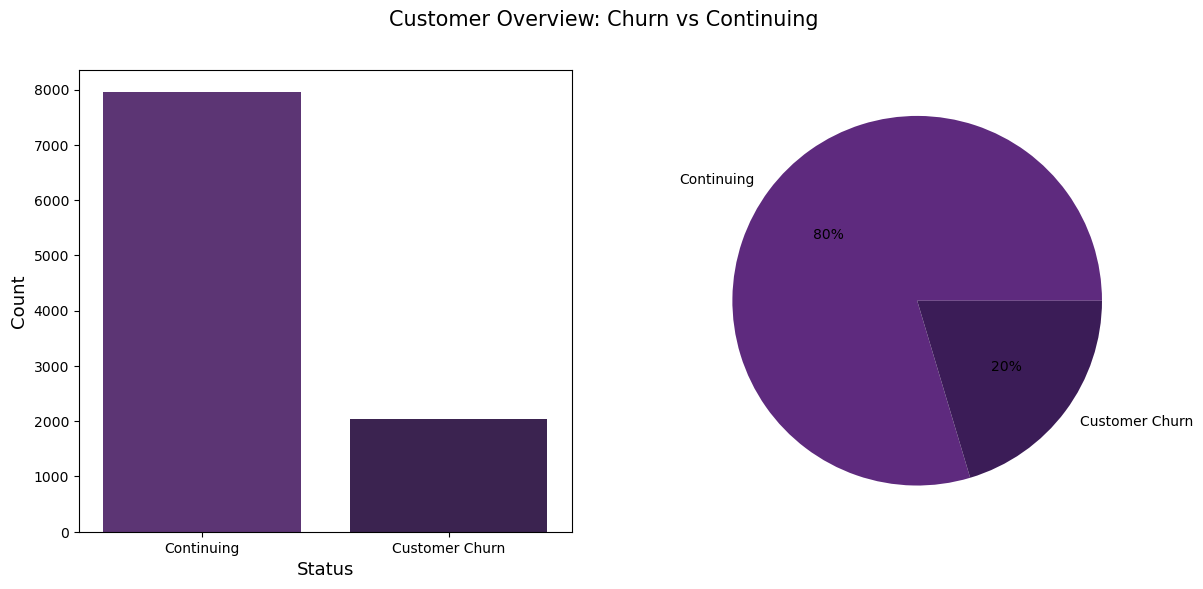

In [9]:
# Visualization of The number of people having diabetes and those who dont
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Customer Overview: Churn vs Continuing", size=15)

# Putting necessary values in the data1
data1 = [data[data['churn'] == 0].shape[0], data[data['churn'] == 1].shape[0]]
labels = ['Continuing', 'Customer Churn']

# Using a purple color palette
colors = colors = ["#5E2A7E", "#3B1C57"] 

# Creating side by side comparative plots
# Pie chart
ax2.pie(data1, labels=labels, colors=colors, autopct='%.0f%%')
# Bar plot
sns.barplot(x=labels, y=data1, ax=ax1, palette=colors)  # Using the purple palette
ax1.set_xlabel('Status', fontsize=13)
ax1.set_ylabel('Count', fontsize=13)

plt.show()


* Nearly 8000 people choose to continue using their current bank while 2000 people decide not to, making it a ratio of 8:2.

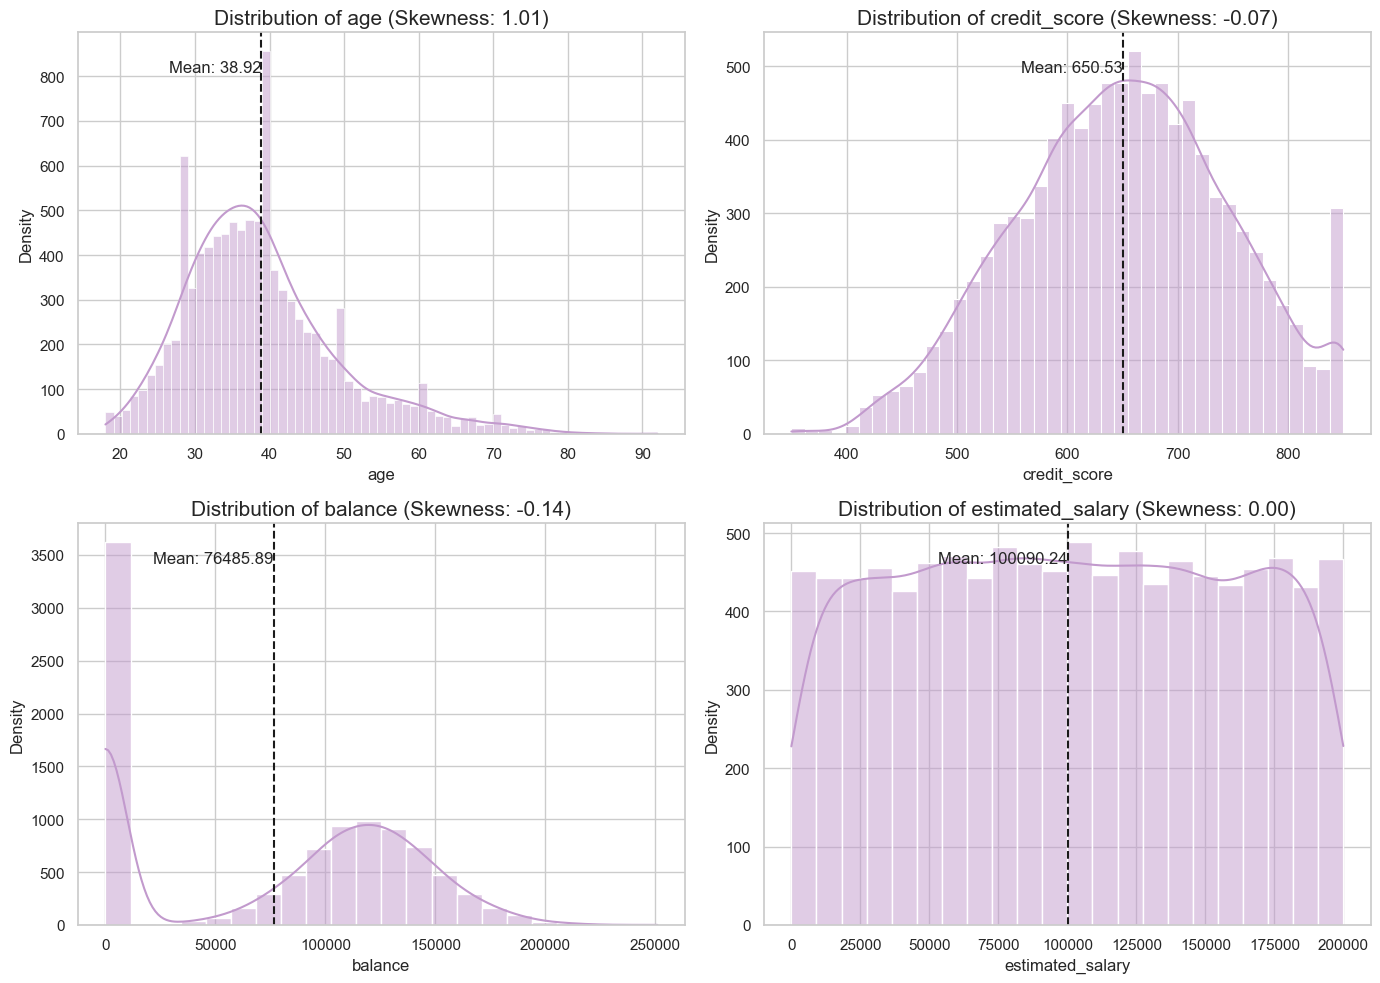

In [10]:
# The distribution of Age, Estimated Income, 
light_purple = "#C29ACD"

# Set the style for better visualization
sns.set(style="whitegrid")

# Create a list of columns to plot
columns_to_plot = ['age', 'credit_score', 'balance', 'estimated_salary']

# Set up the figure with subplots: 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  # Adjust the size as necessary

# Flatten the axes array for easier looping
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # Plot histogram on ith subplot
    sns.histplot(data[col], kde=True, color=light_purple, ax=axes[i])
    skewness = data[col].skew()
    axes[i].set_title(f'Distribution of {col} (Skewness: {skewness:.2f})', fontsize=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Display mean value as a line
    mean_value = data[col].mean()
    axes[i].axvline(mean_value, color='k', linestyle='--')
    axes[i].text(mean_value, 0.9 * axes[i].get_ylim()[1], f'Mean: {mean_value:.2f}', horizontalalignment='right')

# Automatically adjust subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()
plt.show()


1. **Age:** 
* The mean age of customers is 38.92.
* The skewness of 1.01 indicates the data is right-skewed with majority of customers in the younger age group. 
* Younger customers might be reasons for the churn of customers, which company can invest further to identify the reaasons behind the leaving of those demographics.
2. **Credit Score:**
* The mean credit score if about 650.
* The distribution is nearly symmetrical and follows a normal distribution.
3. **Balance:**
* The mean balance is 76,485 with a high density in the 0 balance.
* Churn risk can be associated with those accounts with no balance.
4. **Estimated Salary:** 
* The distribution of the salary is perfectly symmetrical.
* Salary alone is not the factor to distinguish the pattern for customer churn.

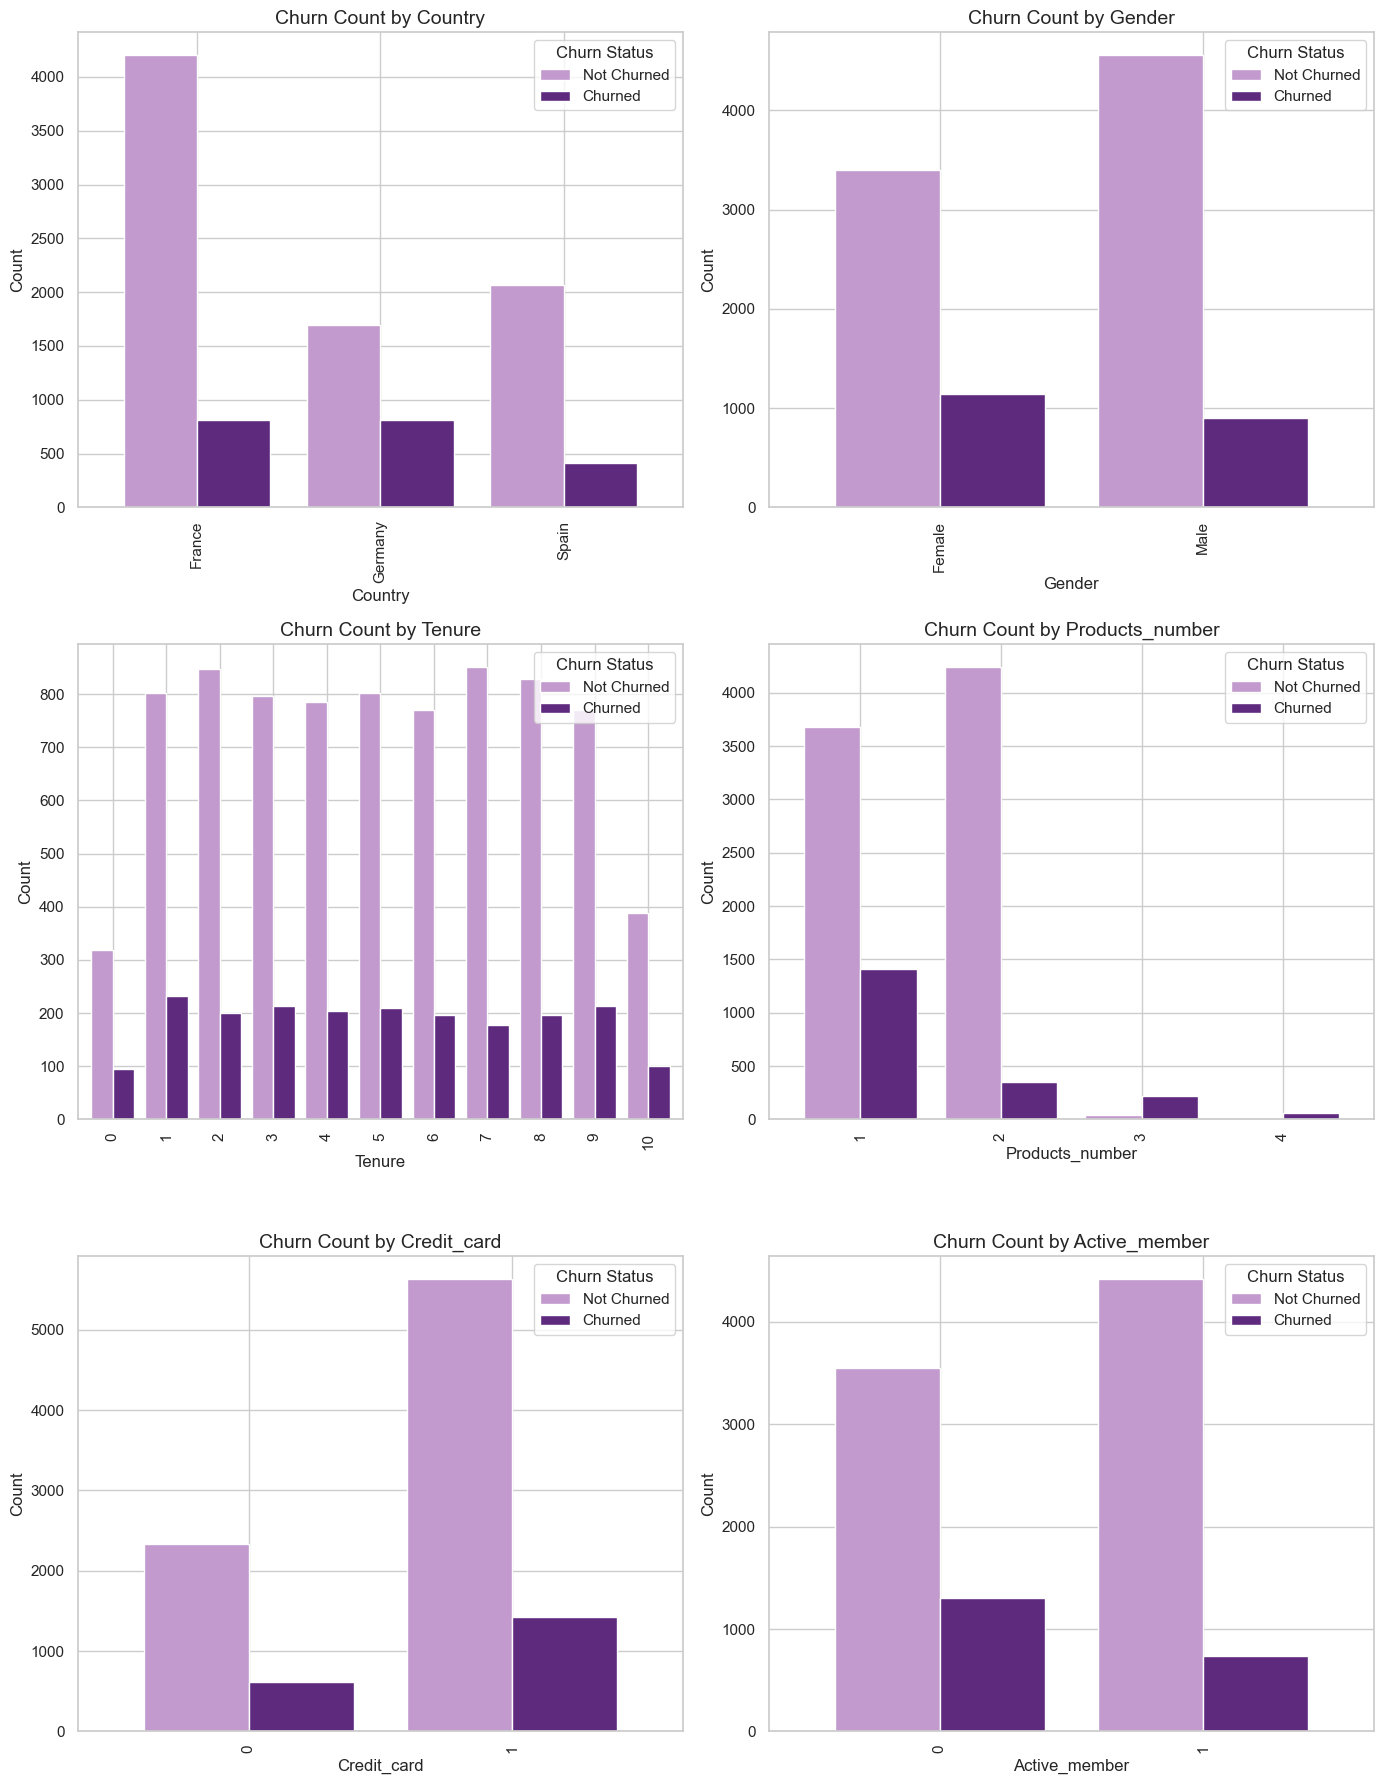

In [11]:
# Setting the colors for not churned and churned
colors = ["#C29ACD", "#5E2A7E"]  # Light Purple and Dark Purple

# Define the columns to plot
columns_to_plot = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))  # 3 rows and 2 columns of plots
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate over

# Loop through the columns and create a bar chart for each
for i, col in enumerate(columns_to_plot):
    # Create a cross-tabulation of churn counts
    churn_count = pd.crosstab(data[col], data['churn'])
    # Plotting the churn counts as adjacent bars
    churn_count.plot(kind='bar', stacked=False, color=colors, ax=axes[i], width=0.8)
    axes[i].set_title(f'Churn Count by {col.capitalize()}', fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    # Adjust the legend to specify churn status
    axes[i].legend(title='Churn Status', labels=['Not Churned', 'Churned'])

# Adjust layout to prevent any overlap
plt.tight_layout()
plt.show()

1. **Country:** 
* France and Germany have the most churned customers.
* The number of continuing customers are more significant in France compared to other countries, followed by Spain and Germany.
2. **Gender:**
* Females are likely to switch banks compared to males by their higher number of churned and lower number of people who stay.
3. **Tenure:**
* Tenure from 1-9 tend to move banks much more in comparison with Tenure 0 and Tenure 10.
* Customers who have 0 year or more than 10 years with the Bank are more likely to stay.
4. **Product Number:** 
* Customers using 1 to 2 products account for the highest proportion, however the churned amount is still lower than the not churned.
* In the amount of customers who have used 3 to 4 products, the number of churned clearly outweigh the not churned one.
5. **Credit Card:**
* There are people who have a credit card and consequently they have higher head count both in terms of loyal customers or leaving customers.
6. **Active Member:**
* The number of active and non-active member are not much different with roughly 4500 and 3500, while active members tend to stay with the bank.

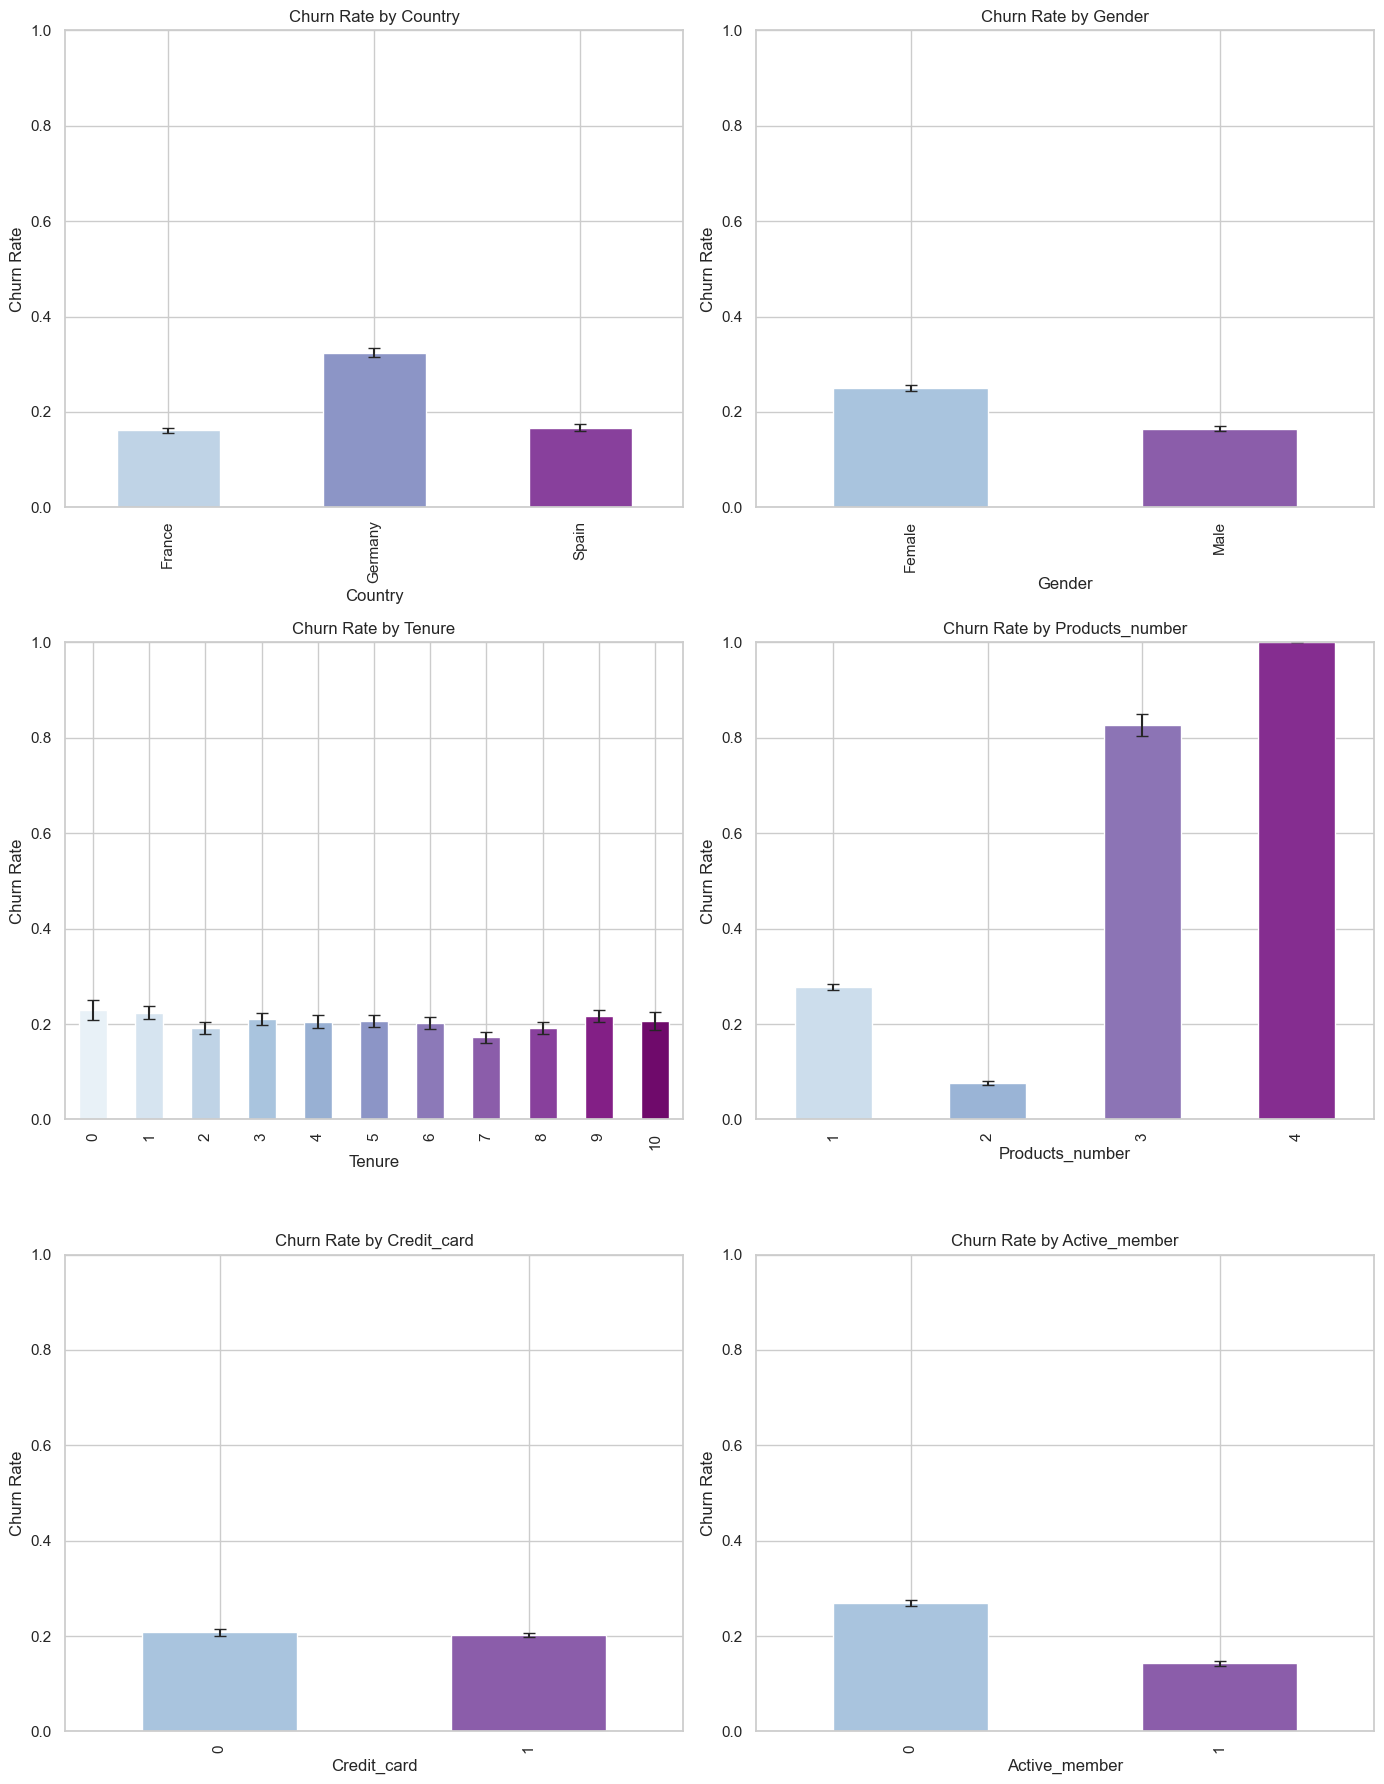

In [12]:
# Feature columns
categories = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, category in enumerate(categories):
    # Calculate churn rate
    churn_rate = data.groupby(category)['churn'].mean()
    # Calculate the standard error of the churn rate
    count = data.groupby(category)['churn'].count()
    std_error = np.sqrt(churn_rate * (1 - churn_rate) / count)

    # Get unique number of categories
    unique_categories = churn_rate.index.nunique()

    # Generate a color palette with a unique color for each category
    palette = sns.color_palette("BuPu", unique_categories)

    # Plotting
    ax = axes[i]
    churn_rate.plot(kind='bar', yerr=std_error, color=palette, ax=ax, capsize=4)
    ax.set_title(f'Churn Rate by {category.capitalize()}')
    ax.set_xlabel(category.capitalize())
    ax.set_ylabel('Churn Rate')
    ax.set_ylim(0, 1)  # Adjust y-limits to make error bars visible

# Adjust layout and display plot
plt.tight_layout()
plt.show()

plt.show()

1. **Country:** 
* Germany has the highest churn rate, while Spain and Germany share approximately the same rate.
2. **Gender:**
* Higher churn rate is observed in males compared to females.
3. **Tenure:**
* People who have been using a bank for 7 years have the lowest churn rate.
4. **Product Number:** 
* People using 3-4 products from ABC bank are a lot fewer in comparison to customers using 1-2 products but their churn rate are most higher.
5. **Credit Card:**
* Having or not having a credit card does not pose much difference in terms of churn rate.
6. **Active Member:**
* Non-active member has a higher churn rate compared to active ones.

### 2. Data Preprocessing

In [13]:
# Checking for null values
data.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

* Our data does not seem to have any null values, therefore there is no need to handle missing values in this case. However, there are several approaches on how we can deal with missing values such as implementing mode/mean/median imputation for certain type of variables in the columns.

### Converting Categorical Variables to Numerical Variables

In [14]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

* Country and gender are in categorical type.

In [15]:
#Converting Gender to Numerical values
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes

#Converting Country to Numerical values
data['country'] = data['country'].astype('category')
data['country'] = data['country'].cat.codes

# Checking the data
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Gender and Country Encoding Clarification:
1. **Gender:** 
* 0: Female
* 1: Male
2. **Country:**
* 0: France
* 1: Spain
* 2: Germany

In [16]:
### Drop Customer_ID Column
data.drop(['customer_id'],axis=1,inplace=True)

In [17]:
### Final data for modelling
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


* All of the columns in our data are now in numerical format and ready to be used for machine learning purposes.

### Correlation Matrix

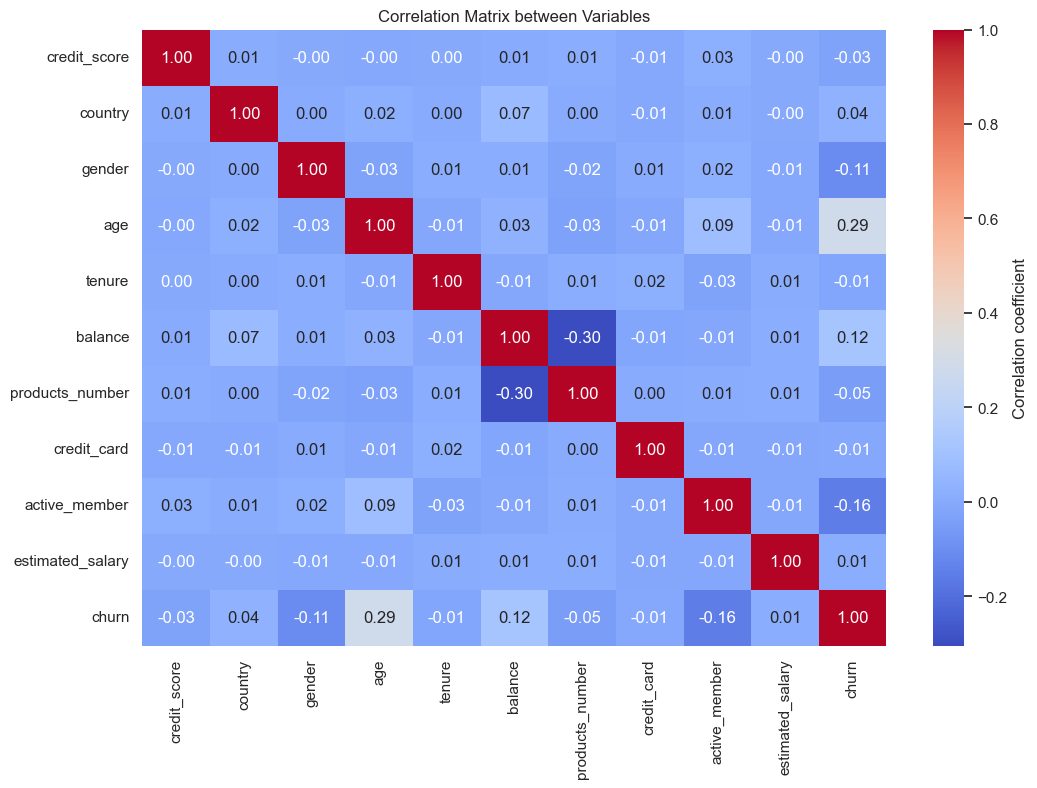

In [18]:
# Correlation between predictive variables and target variable "Outcome"
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'})

plt.title('Correlation Matrix between Variables')
plt.show()

In [19]:
# Most correlated and least correlated variables with Outcome

# Isolating the 'Outcome' correlation series
outcome_correlation = correlation_matrix['churn']

# Sorting the correlations to find the top 3 most and least correlated variables
most_correlated = outcome_correlation.abs().sort_values(ascending=False)[1:4]  
least_correlated = outcome_correlation.abs().sort_values(ascending=True)[:3]

print("Top 3 most correlated variables with 'churn':")
print(most_correlated)

print("\nTop 3 least correlated variables with 'churn':")
print(least_correlated)


Top 3 most correlated variables with 'churn':
age              0.285323
active_member    0.156128
balance          0.118533
Name: churn, dtype: float64

Top 3 least correlated variables with 'churn':
credit_card         0.007138
estimated_salary    0.012097
tenure              0.014001
Name: churn, dtype: float64


* Age is the variable with highest correlation with Gender with 0.28, followed by Active Member status with much lower ratio of -0.16 and balance with nearly 0.12, which means the higher the Age, the higher chance for them to switch to another bank. 
* Active_member and gender have negative relationships with churn rate, meaning that Non-Active and Females tend to switch banks more oftern.
* Balance has a positive relationship with churn rate, meaning that the higher the balance, these customers are more likely to leave in order to find better services.

## 3. Data Modelling

### Features Selection using RFE

In [20]:
# Prepare X and Y for modeling
X = data.drop('churn',axis=1) #Selecting our predictors
y = data['churn'] #Selecting our Reponse Variable

In [21]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [22]:
#Scale the data before applying to the model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
from sklearn.feature_selection import RFE

# Estimating accuracy score on test by using different number of features
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Accuracy on test set using", i, "features: ", round(acc_score,4))
    # append to the list
    acc_scores.append(acc_score)

Accuracy on test set using 1 features:  0.79
Accuracy on test set using 2 features:  0.821
Accuracy on test set using 3 features:  0.825
Accuracy on test set using 4 features:  0.8165
Accuracy on test set using 5 features:  0.8165
Accuracy on test set using 6 features:  0.8185
Accuracy on test set using 7 features:  0.8175
Accuracy on test set using 8 features:  0.8175
Accuracy on test set using 9 features:  0.821


Number of features to select: 3
Accuracy Score: 0.825


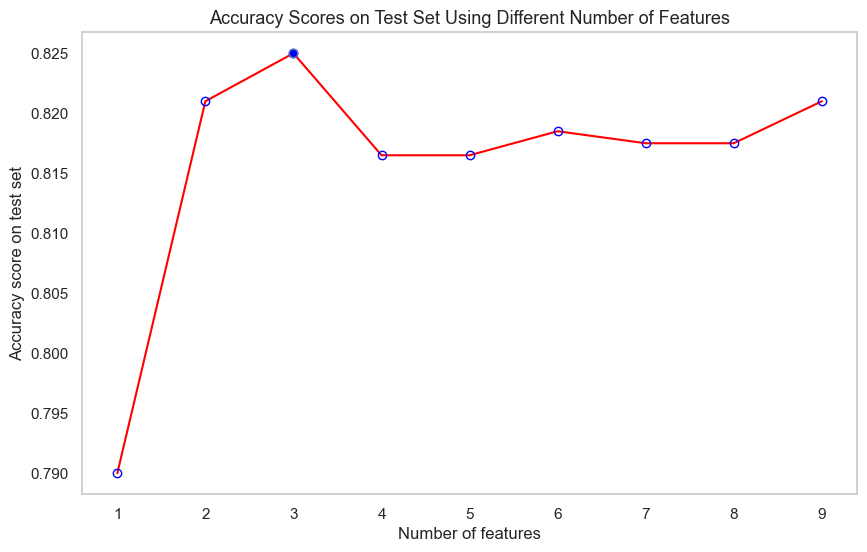

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


estimator = LogisticRegression()
acc_scores = []

# Perform RFE with varying numbers of features and record the accuracy score
for i in range(1, 10):
    selector = RFE(estimator, n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
# Find the number of features for the best accuracy score
best_num_features = acc_scores.index(max(acc_scores)) + 1

# Plotting
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel('Number of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker='o', color='red', markeredgewidth=1, markeredgecolor='blue', markerfacecolor='None')
plt.plot(best_num_features, max(acc_scores), marker='o', markerfacecolor='blue')
plt.title("Accuracy Scores on Test Set Using Different Number of Features", size=13)

# Print the best number of features and the corresponding accuracy
print("Number of features to select:", best_num_features)
print("Accuracy Score:", max(acc_scores))

plt.show()

### Using various machine learning models

In [55]:
### Apply various machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

def evaluate_models(X_train, y_train, X_test, y_test):
    # Initializing models
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
    gauss = GaussianNB()
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    
    # List to store models for ease of iteration
    models = [log, knn, gauss, tree, forest]
    model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest']
    
    # Dictionary to hold training and testing accuracies
    accuracies = {}

    # Train and evaluate each model
    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)  # Training model
        y_pred_train = model.predict(X_train)  # Predicting on training set
        y_pred_test = model.predict(X_test)  # Predicting on test set

        train_accuracy = accuracy_score(y_train, y_pred_train)  # Accuracy on training set
        test_accuracy = accuracy_score(y_test, y_pred_test)  # Accuracy on test set

        accuracies[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

        # Print accuracies for each model
        print(f"{name} Training Accuracy: {train_accuracy:.4f}")
        print(f"{name} Testing Accuracy: {test_accuracy:.4f}")
        print("----------------------------")

    return accuracies

# Example usage of the function
model_accuracies = evaluate_models(X_train, y_train, X_test, y_test)


Logistic Regression Training Accuracy: 0.8057
Logistic Regression Testing Accuracy: 0.8210
----------------------------
K-Nearest Neighbors Training Accuracy: 0.8698
K-Nearest Neighbors Testing Accuracy: 0.8415
----------------------------
Gaussian Naive Bayes Training Accuracy: 0.8244
Gaussian Naive Bayes Testing Accuracy: 0.8435
----------------------------
Decision Tree Training Accuracy: 1.0000
Decision Tree Testing Accuracy: 0.7895
----------------------------
Random Forest Training Accuracy: 0.9846
Random Forest Testing Accuracy: 0.8695
----------------------------


**Observations:**
* Random Forest is the model with the highest accuracy on the test set, followed by Naive Bayes and K Nearest Neighbors.
* The testing accuracy is lower than the training accuracy in Ramdom Forest, Decision Tree and K Nearest Neighbors, which suggests there might be some overfittng in these models, where the most significant overfitting seen in Decision with perfect training accuracy of 1 and much lower testing accuracy with only 0.78
* Apart from Decision Tree, the rest accuracy score does not vary much between the test and training set, which means that every model perform well in this.

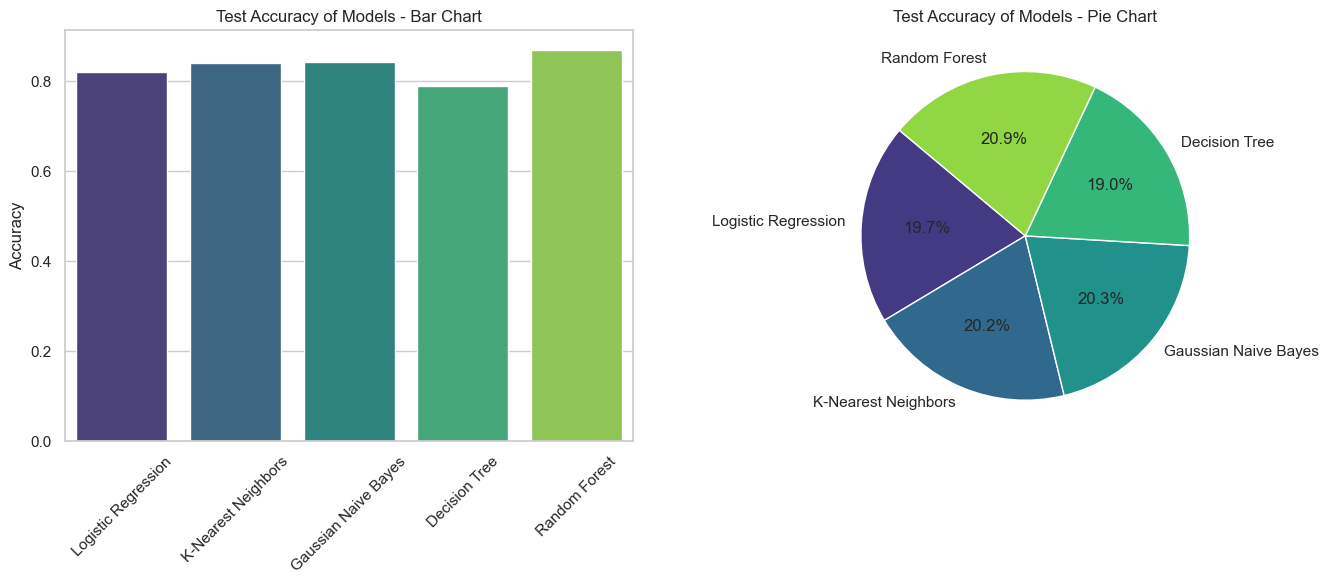

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_accuracies(model_accuracies):
    # Prepare data for plotting
    names = list(model_accuracies.keys())
    test_accuracies = [model_accuracies[name]['Test Accuracy'] for name in names]

    # Set up the matplotlib figure
    plt.figure(figsize=(14, 6))

    # Bar chart
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.barplot(x=names, y=test_accuracies, palette='viridis')
    plt.title('Test Accuracy of Models - Bar Chart')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.pie(test_accuracies, labels=names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(names)))
    plt.title('Test Accuracy of Models - Pie Chart')

    # Display the plots
    plt.tight_layout()
    plt.show()

# model_accuracies = evaluate_models(X_train, y_train, X_test, y_test)
visualize_accuracies(model_accuracies)

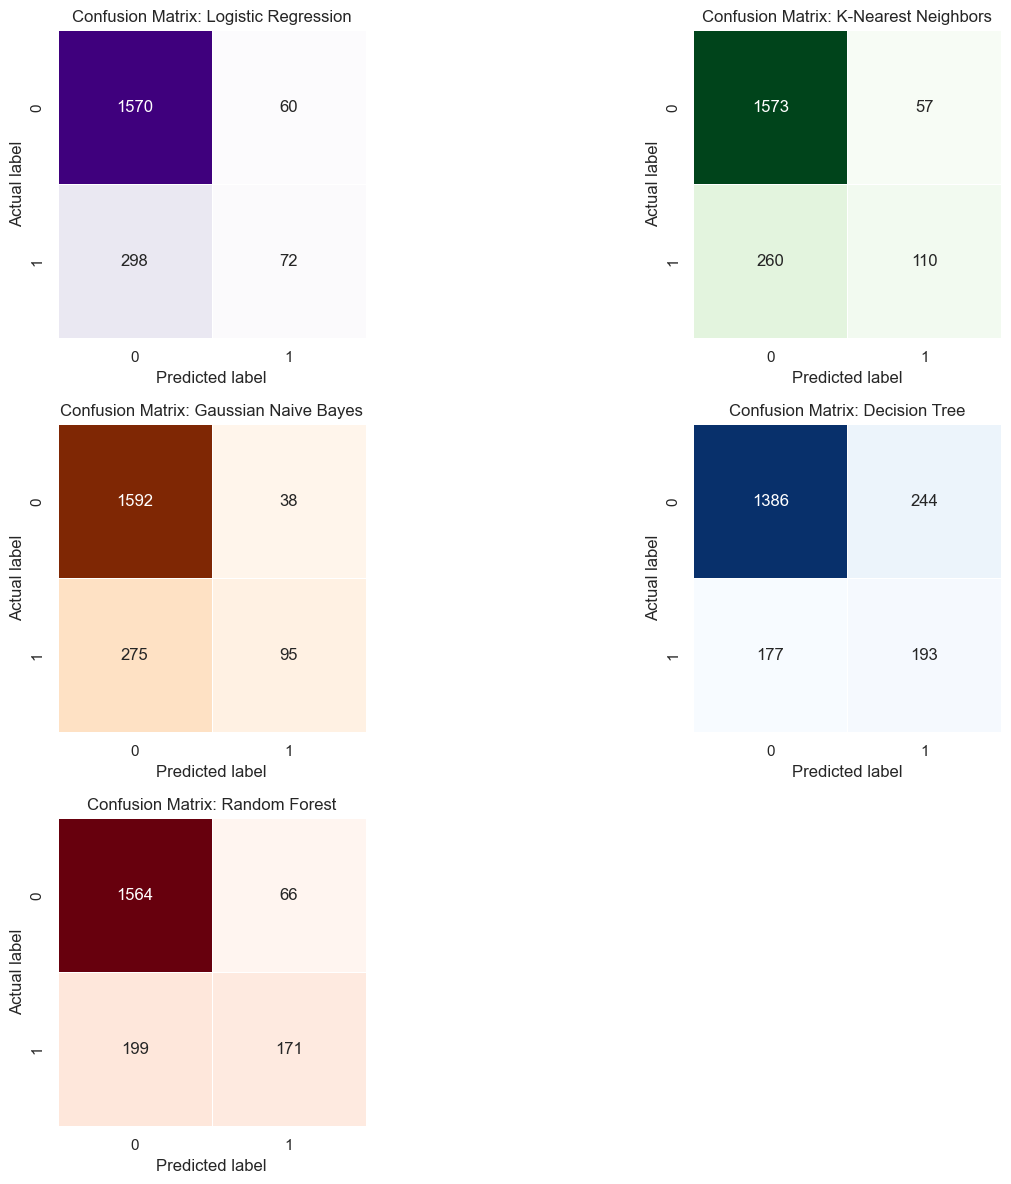

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For visually appealing confusion matrices

def plot_confusion_matrices(X_train, y_train, X_test, y_test):
    # Initialize models
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
    gauss = GaussianNB()
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    forest = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)  # Random Forest

    # List to store models for ease of iteration
    models = [log, knn, gauss, tree, forest]
    model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest']
    colors = ['Purples', 'Greens', 'Oranges', 'Blues', 'Reds']  # Color for Random Forest added

    # Train and predict with each model
    plt.figure(figsize=(14, 12))  # Increased figure size for 5 models
    for idx, (model, name, color) in enumerate(zip(models, model_names, colors), start=1):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        # Subplot for each confusion matrix
        plt.subplot(3, 2, idx)  # 3 rows, 2 columns to accommodate 5 models
        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap=color, cbar=False)
        plt.title(f'Confusion Matrix: {name}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()


plot_confusion_matrices(X_train, y_train, X_test, y_test)


* True Positives: Decision Tree and Random Forest do best in predicting the TP with 193 and 171, followed by K-Nearest Neighbors. Logistic Regression is the model with the least TP, which means that Decision Tree is able to predict the people who decide to leave ABC Bank.
* True Negatives: Apart from Decision Tree, all 4 models perform well with TN approximately around 1500, where Naive Bayes can predict the best in terms of people who stay.
* Decision has the most of FN and FP, while Random Forest has the least.
* Overall, Random Forest can predict the people who churn higher than the rest except from Decision Tree and it also has a relatively high TN as well, which indicate it is the best model.


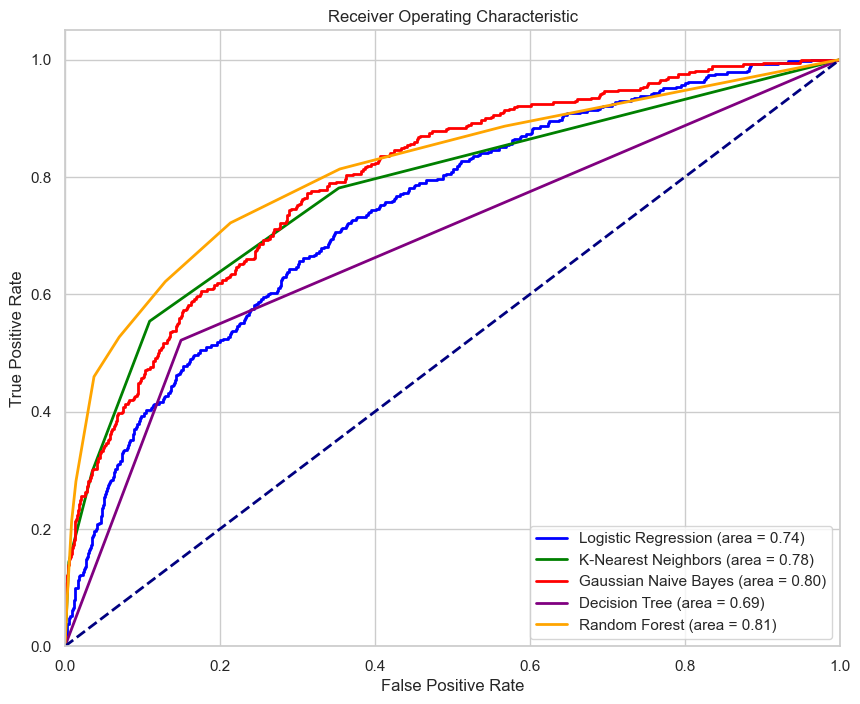

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

def plot_roc_curves(X_train, y_train, X_test, y_test):
    # Initialize models
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
    gauss = GaussianNB()
    tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

    # List to store models for easy iteration
    models = [log, knn, gauss, tree, forest]
    model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest']
    colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colors for each ROC curve

    # Prepare figure
    plt.figure(figsize=(10, 8))
    for model, name, color in zip(models, model_names, colors):
        # Train the model
        model.fit(X_train, y_train)
        # Compute predicted probabilities: keep probabilities for the positive class only
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            # Use decision function if predict_proba is not available
            y_score = model.decision_function(X_test)
            y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # Scale to [0, 1]

        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (area = {roc_auc:.2f})')

    # Plot Base Rate ROC
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


plot_roc_curves(X_train, y_train, X_test, y_test)


With an AUC of 0.81, the ROC Curve once again shows that Random Forest is the most effective model out of all those that were tested. In comparison to the other models, this shows a very good predictive performance with a better likelihood of accurately identifying the positive and negative classes.